<a href="https://colab.research.google.com/github/zahidalidev/Data-Mining-ML-CLassification-Linear-Regression-Logistics-Regression-Clustring-Association/blob/main/DM_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from apyori import apriori

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# reading dataset
dataFrame = pd.read_excel('/content/allmatch.xlsx')





In [ ]:
# Linear Regression

# preprocessing
columns = ["Delivery Speed", "Total Runs "]
df = dataFrame[columns]

# removing NaN and Unknown values
df=df[df['Delivery Speed'].notna()]
df=df[df['Delivery Speed']!='Unknown']

X = df[["Delivery Speed"]].to_numpy()
Y = df["Total Runs "].to_numpy()


XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.40, random_state=42)

linear_regression=LinearRegression().fit(XTrain,YTrain)

yPred=linear_regression.predict(XTest)

yPred=np.round(yPred,0)

regression_model_accuracy=accuracy_score(YTest, yPred)

print("Accuracy", regression_model_accuracy*100)

# # Plot outputs
# plt.scatter(XTest, YTest, color="black")
# plt.plot(XTest, yPred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())
# plt.xlabel("Delivery Speed")
# plt.ylabel("Total Runs")
# plt.show()


Accuracy 40.625


In [ ]:
# Classification KNN 
columns = ["Shot Type ", "Outcome"]
knnDf = dataFrame[columns]

# Preprocessing, removing NaN and Unknown values
knnDf=knnDf[knnDf['Shot Type '].notna()]
knnDf=knnDf[knnDf['Shot Type ']!='Unknown']
knnDf=knnDf[knnDf['Outcome'].notna()]
knnDf=knnDf[knnDf['Outcome']!='Unknown']

# encoding labels.
knnDf['Shot Type '] = label_encoder.fit_transform(knnDf['Shot Type '])
knnDf['Outcome'] = label_encoder.fit_transform(knnDf['Outcome'])

# to numpy array
X = knnDf[["Shot Type "]].to_numpy()
Y = knnDf["Outcome"].to_numpy()

X=X.astype('int')

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.25, random_state=42)

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(XTrain,YTrain)

yPred=knn.predict(XTest)

knn_preprocessing_model_accuracy=accuracy_score(YTest, yPred)
print(knn_preprocessing_model_accuracy*100)

print(knnDf)
# # Plot outputs
# plt.scatter(XTest, YTest, color="black")
# plt.plot(XTest, yPred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())
# plt.xlabel("Shot Type")
# plt.ylabel("Outcome")
# plt.show()

48.0
     Shot Type   Outcome
2             8       13
4             2        3
5             0        2
6             3        6
7             2        6
..          ...      ...
449          13        6
454          35        2
456          38        6
457          33        6
458          31       12

[300 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


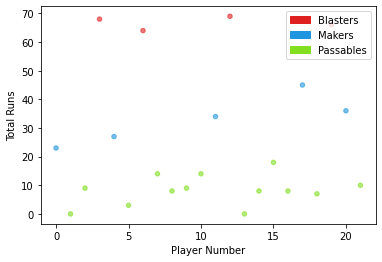

     Batsman_Name+Cricinfo_Link  Total Runs   ...      cen_y        c
437                           0           23  ...  33.000000  #2095DF
438                           1            0  ...   8.307692  #81DF20
439                           2            9  ...   8.307692  #81DF20
440                           3           68  ...  66.750000  #DF2020
441                           4           27  ...  33.000000  #2095DF
442                           5            3  ...   8.307692  #81DF20
443                           6           64  ...  66.750000  #DF2020
444                           7           14  ...   8.307692  #81DF20
445                           8            8  ...   8.307692  #81DF20
446                           9            9  ...   8.307692  #81DF20
447                          10           14  ...   8.307692  #81DF20
448                          11           34  ...  33.000000  #2095DF
449                          12           69  ...  66.750000  #DF2020
450                 

In [ ]:
# Clustring
columns = ["Batsman_Name+Cricinfo_Link", "Total Runs "]
kmDf = dataFrame[columns]

batsmans = kmDf[["Batsman_Name+Cricinfo_Link"]].values
uniqueBatsmans = np.unique(batsmans)

batsmanWithRuns = kmDf.to_numpy()
for i, x in enumerate(uniqueBatsmans):
  uniqueBatsmans[i] = np.array([uniqueBatsmans[i], 0])

for i, x in enumerate(uniqueBatsmans):
  for j, y in enumerate(batsmanWithRuns):
    if(uniqueBatsmans[i][0] == batsmanWithRuns[j][0]):
      uniqueBatsmans[i][1] = int(uniqueBatsmans[i][1]) + int(batsmanWithRuns[j][1])

X = []
Y = []

for i, x in enumerate(uniqueBatsmans):
  X.append([uniqueBatsmans[i][0]])
  Y.append(int(uniqueBatsmans[i][1]))

X = np.array(X)
Y = np.array(Y)

X = label_encoder.fit_transform(X)
X = np.array(X)

index = len(kmDf) - len(X)
kmDf = kmDf.truncate(index)

kmDf["Batsman_Name+Cricinfo_Link"] = X
kmDf["Total Runs "] = Y

# k means
kmeans = KMeans(n_clusters=3, random_state=0)

kmDf['cluster'] = kmeans.fit_predict(kmDf[["Batsman_Name+Cricinfo_Link", "Total Runs "]])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
kmDf['cen_x'] = kmDf.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
kmDf['cen_y'] = kmDf.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
kmDf['c'] = kmDf.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(kmDf["Batsman_Name+Cricinfo_Link"], kmDf["Total Runs "], c=kmDf.c, alpha = 0.6, s=20)

plt.xlabel("Player Number")
plt.ylabel("Total Runs")
red_patch = mpatches.Patch(color='#DF2020', label='Blasters')
blue_patch = mpatches.Patch(color='#81DF20', label='Passables')
green_patch = mpatches.Patch(color='#2095DF', label='Makers')

plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

print(kmDf)

In [ ]:
# Logistic Regression

# reading dataset
pakDataFrame = pd.read_excel('/content/pakindea.xlsx')

# preprocessing
columns = ["Ground", "Winner"]
logisDf = pakDataFrame[columns]

# removing NaN and Unknown values
logisDf=logisDf[logisDf['Ground'].notna()]
logisDf=logisDf[logisDf['Winner']!='no result']
logisDf=logisDf[logisDf['Winner']!='abandoned']

logisDf['Ground'] = label_encoder.fit_transform(logisDf['Ground'])
logisDf['Winner'] = label_encoder.fit_transform(logisDf['Winner'])

X = logisDf[["Ground"]].to_numpy()
Y = logisDf["Winner"].to_numpy()


XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.30, random_state=42)

model = LogisticRegression(random_state=0)

model.fit(XTrain, YTrain)

yPred = model.predict(XTest)

logistic_model_accuracy=accuracy_score(YTest, yPred)

print("Accuracy", logistic_model_accuracy*100)

# Plot outputs
# plt.scatter(XTest, YTest, color="black")
# plt.plot(XTest, yPred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())
# plt.xlabel("Ground")
# plt.ylabel("Winner")
# plt.show()

# cm = confusion_matrix(YTest, yPred)
# print ("Confusion Matrix : \n", cm)
# plt.show()

Accuracy 51.85185185185185


In [ ]:
# Association, Apriori

appDf = dataFrame

appDf=appDf[['Delivery Length', 'Delivery Line', 'Shot Type ', 'Hit Type', 'Ball Type','Out_type']]


# preprossing
appDf=appDf[appDf['Delivery Length'].notna()]
appDf=appDf[appDf['Delivery Length']!='Unknown']
appDf=appDf[appDf['Delivery Line'].notna()]
appDf=appDf[appDf['Delivery Line']!='Unknown']
appDf=appDf[appDf['Shot Type '].notna()]
appDf=appDf[appDf['Shot Type ']!='Unknown']
appDf=appDf[appDf['Hit Type'].notna()]
appDf=appDf[appDf['Hit Type']!='Unknown']
appDf=appDf[appDf['Ball Type'].notna()]
appDf=appDf[appDf['Ball Type']!='Unknown']
appDf=appDf[appDf['Out_type'].notna()]
appDf=appDf[appDf['Out_type']!='Unknown']

appDf.shape
recordList = []
for i in range(0, 5):
  recordList.append([str(appDf.values[i, j]) for j in range(0, 5)])

rules = apriori(recordList, min_support = 0.30, min_confidence = 0.25, min_lift = 2.0, min_length = 2)
response = list(rules)
response


[RelationRecord(items=frozenset({'into the pads', 'Full length(5-6 m)'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Full length(5-6 m)'}), items_add=frozenset({'into the pads'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'into the pads'}), items_add=frozenset({'Full length(5-6 m)'}), confidence=1.0, lift=2.5)]),
 RelationRecord(items=frozenset({'into the pads', 'Full length(5-6 m)', 'Flick'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Full length(5-6 m)'}), items_add=frozenset({'into the pads', 'Flick'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'into the pads'}), items_add=frozenset({'Full length(5-6 m)', 'Flick'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'Full length(5-6 m)', 'Flick'}), items_add=frozenset({'into the pads'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'into the pads', 'Flick'}), items_add=frozenset({'Full leng

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=bde10ccc3c3981c3e569a1ec32445b26d67e5db544e1fc023fc145ad59944621
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
